In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [28]:
train_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

In [29]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [30]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [31]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [32]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [33]:
test_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [34]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [35]:
#Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [36]:
#Using Cuda for large datasets if possible
device = torch.device("cuda:0" if  torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [37]:
#Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [38]:
#Data Loader
# Making batches

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [39]:
#Check out what the data loder does
#maps the value to (0, 1)
#makes the data of shape (batch_size, color, height, width)

tmp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3686, 0.9569,
           0.1020, 0.0000, 0.0000, 0.0000, 

In [40]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [41]:
#Train the model
n_epochs = 10

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets in train_loader:
    #Move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Reshape the input
    inputs = inputs.view(-1, 784)

    #Zero the parameter gradients
    optimizer.zero_grad()

    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    #Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  #Get train loss and test loss
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    #Move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())

  #Get train loss and test loss
  test_loss = np.mean(test_loss)

  #Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f'Epoch {it + 1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')




Epoch 1/10, Train Loss: 0.4162, Test Loss: 0.2177
Epoch 2/10, Train Loss: 0.1938, Test Loss: 0.1564
Epoch 3/10, Train Loss: 0.1425, Test Loss: 0.1347
Epoch 4/10, Train Loss: 0.1120, Test Loss: 0.1090
Epoch 5/10, Train Loss: 0.0916, Test Loss: 0.0995
Epoch 6/10, Train Loss: 0.0761, Test Loss: 0.0904
Epoch 7/10, Train Loss: 0.0645, Test Loss: 0.0827
Epoch 8/10, Train Loss: 0.0532, Test Loss: 0.0854
Epoch 9/10, Train Loss: 0.0462, Test Loss: 0.0786
Epoch 10/10, Train Loss: 0.0389, Test Loss: 0.0781


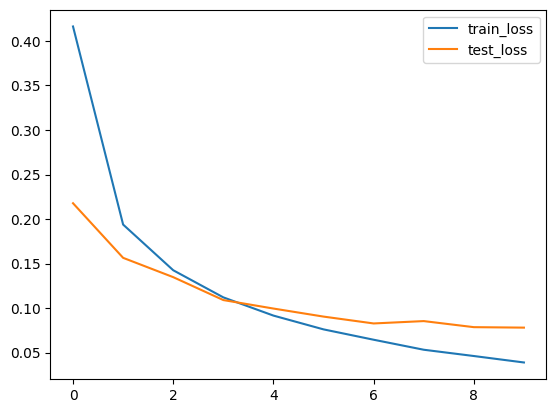

In [42]:
#Plot train loss and test loss per iteration
plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend()
plt.show()

In [43]:
#Calculate the accuracy

n_correct = 0
n_total = 0

for inputs, targets in train_loader:
  #Move the data to GPU
   inputs, targets = inputs.to(device), targets.to(device)

   #Reshape the input
   inputs = inputs.view(-1, 784)

   #Forward pass
   outputs = model(inputs)

   #Get predictions
   _, predictions = torch.max(outputs, 1)

   #Update counts
   n_correct += (predictions == targets).sum().item()
   n_total += targets.shape[0]

train_acc = n_correct/n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  #Move the data to GPU
   inputs, targets = inputs.to(device), targets.to(device)

   #Reshape the input
   inputs = inputs.view(-1, 784)

   #Forward pass
   outputs = model(inputs)

   #Get predictions
   _, predictions = torch.max(outputs, 1)

   #Update counts
   n_correct += (predictions == targets).sum().item()
   n_total += targets.shape[0]

test_acc = n_correct/n_total

print(f'Train accuracy: {train_acc: .4f}, Test accuracy: {test_acc: .4f}')



Train accuracy:  0.9916, Test accuracy:  0.9752


In [44]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def  plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment= "center",
             color = "white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

Confusion matrix, without normalization
[[ 968    0    1    1    3    3    1    0    2    1]
 [   0 1127    4    0    0    1    2    0    1    0]
 [   6    1 1004    2    2    0    2    9    6    0]
 [   0    0    4  989    2    1    0    7    4    3]
 [   1    0    2    1  967    0    3    3    0    5]
 [   3    0    0   10    1  871    3    1    2    1]
 [   5    3    3    1    3   19  923    0    1    0]
 [   0    8    9    3    1    1    0 1000    0    6]
 [   2    1    4   11    3    4    1    6  938    4]
 [   1    5    0    7   12    3    1   12    3  965]]


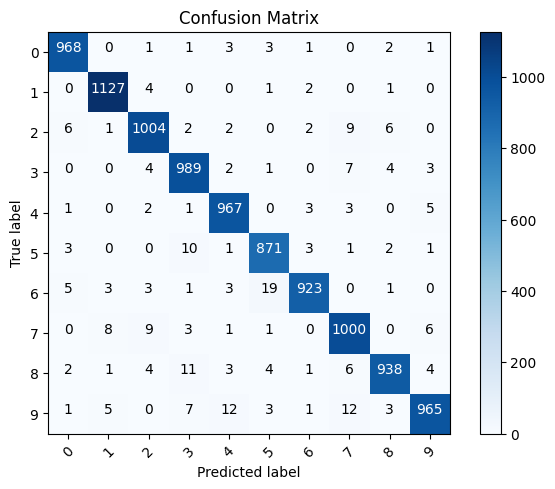

In [45]:
#Get all predictions and plot confusion matrix
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
  #Move the data to GPU
   inputs= inputs.to(device)

   #Reshape the input
   inputs = inputs.view(-1, 784)

   #Forward pass
   outputs = model(inputs)

   #Get predictions
   _, predictions = torch.max(outputs, 1)

   #Update p_test
   p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

